## MySQL에서 데이터 로드 

In [ ]:
#pip install pymysql

In [57]:
#pip install seaborn

In [58]:
import pymysql
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
# MySQL 연결 정보
DB_HOST = "15.168.145.74" 
DB_USER = "lab08"  
DB_PASSWORD = "Multi1234!" 
DB_NAME = "my_db" 

In [9]:
# MySQL에서 데이터 가져오기
conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)
car_siren = f"SELECT * FROM merge_car_siren"
car_horn = f"SELECT * FROM merge_car_horn"
car_driving = f'SELECT * FROM merge_car_driving_sound'
motorcycle_horn  = f'SELECT * FROM merge_motorcycle_horn'
motorcycle_driving  = f'SELECT * FROM merge_motorcycle_driving_sound'

car_siren_df =  pd.read_sql(car_siren, conn)
car_horn_df = pd.read_sql(car_horn, conn) 
car_driving_df = pd.read_sql(car_driving, conn) 
motorcycle_horn_df= pd.read_sql(motorcycle_horn, conn) 
motorcycle_driving_df = pd.read_sql(motorcycle_driving, conn) 

conn.close()

/tmp/ipykernel_6637/1700635407.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_siren_df =  pd.read_sql(car_siren, conn)
/tmp/ipykernel_6637/1700635407.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_horn_df = pd.read_sql(car_horn, conn)
/tmp/ipykernel_6637/1700635407.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_driving_df = pd.read_sql(car_driving, conn)
/tmp/ipykernel_6637/1700635407.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sq

# EDA 및 전처리

In [10]:
print(f'car_siren 데이터 개수: {car_siren_df.shape[0]}')
print(f'car_horn 데이터 개수: {car_horn_df.shape[0]}')
print(f'car_driving 데이터 개수: {car_driving_df.shape[0]}')
print(f'motorcycle_horn 데이터 개수: {motorcycle_horn_df.shape[0]}')
print(f'motorcycle_driving 데이터 개수: {motorcycle_driving_df.shape[0]}')

car_siren 데이터 개수: 1990
car_horn 데이터 개수: 3189
car_driving 데이터 개수: 1682
motorcycle_horn 데이터 개수: 4560
motorcycle_driving 데이터 개수: 4735


In [11]:
car_horn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fileName       3189 non-null   object 
 1   labelName      3189 non-null   object 
 2   area_start     3189 non-null   float64
 3   area_end       3189 non-null   float64
 4   category_01    3189 non-null   object 
 5   category_02    3189 non-null   object 
 6   category_03    3189 non-null   object 
 7   decibel        3189 non-null   int64  
 8   soundQuality   3189 non-null   object 
 9   subCategory    3189 non-null   object 
 10  bitRate        3189 non-null   object 
 11  duration       3189 non-null   float64
 12  fileFormat     3189 non-null   object 
 13  fileSize       3189 non-null   int64  
 14  recodingType   3189 non-null   object 
 15  sampleRate     3189 non-null   object 
 16  acqDevice      3189 non-null   object 
 17  acqMethod      3189 non-null   object 
 18  acqType 

In [24]:
car_horn_df.head()

,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,1.car_horn_30849_1.wav,1.car_horn_30849_1.wav,2.0,11.048,교통소음,자동차,차량경적,68,정상,소형차경적,...,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,1.car_horn_30865_1.wav,1.car_horn_30865_1.wav,2.0,10.672,교통소음,자동차,차량경적,75,정상,소형차경적,...,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,1.car_horn_30869_1.wav,1.car_horn_30869_1.wav,2.0,12.245,교통소음,자동차,차량경적,68,정상,소형차경적,...,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,1.car_horn_30874_1.wav,1.car_horn_30874_1.wav,2.0,10.289,교통소음,자동차,차량경적,69,정상,소형차경적,...,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,1.car_horn_59_1.wav,1.car_horn_59_1.wav,2.0,4.029,교통소음,자동차,차량경적,107,정상,소형차경적,...,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720


In [23]:
car_horn_df.iloc[ : ,-13:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,-328.99643,110.927765,13.474552,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,-380.94937,82.016785,-38.369390,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,-498.20813,114.061424,1.980113,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,-456.39767,111.490440,-6.244432,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,-199.50888,199.641110,-13.681638,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-264.83923,197.210750,-77.277880,23.032236,11.380154,7.896886,11.269576,-4.560492,17.224950,4.160231,-1.057662,0.926013,-7.930759
3185,-426.90427,130.722400,47.745327,8.306962,5.675391,15.449170,5.677291,6.208929,-0.195498,-5.397255,-2.674880,-6.652485,-10.272819
3186,-316.11063,194.271060,-29.530697,35.808052,12.489090,23.182838,11.050718,3.705868,11.450807,-0.165664,2.353512,0.390641,5.358946
3187,-228.09323,64.343980,-13.663012,41.246460,-7.827433,21.293640,-13.415158,3.358162,5.326135,-3.165687,-11.261456,-1.512664,6.411310


In [28]:
#데이터프레임 병합 
df_combined = pd.concat([car_horn_df, car_siren_df,car_driving_df,motorcycle_horn_df,motorcycle_driving_df], ignore_index=True)

print(f'df_combined 행 개수: {len(df_combined)}') 
df_combined.head()

df_combined 행 개수: 16156


,fileName,labelName,area_start,area_end,category_01,category_02,category_03,decibel,soundQuality,subCategory,...,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,1.car_horn_30849_1.wav,1.car_horn_30849_1.wav,2.0,11.048,교통소음,자동차,차량경적,68,정상,소형차경적,...,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,1.car_horn_30865_1.wav,1.car_horn_30865_1.wav,2.0,10.672,교통소음,자동차,차량경적,75,정상,소형차경적,...,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,1.car_horn_30869_1.wav,1.car_horn_30869_1.wav,2.0,12.245,교통소음,자동차,차량경적,68,정상,소형차경적,...,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,1.car_horn_30874_1.wav,1.car_horn_30874_1.wav,2.0,10.289,교통소음,자동차,차량경적,69,정상,소형차경적,...,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,1.car_horn_59_1.wav,1.car_horn_59_1.wav,2.0,4.029,교통소음,자동차,차량경적,107,정상,소형차경적,...,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720


In [30]:
df_combined.iloc[ : ,-13:] 

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,-328.99643,110.927765,13.474552,37.183453,-10.836115,25.585962,0.232516,5.053774,12.176615,4.831705,-8.831820,10.174751,2.365335
1,-380.94937,82.016785,-38.369390,10.472818,-25.531940,-0.819976,-21.547447,16.138535,-0.490012,0.726548,-9.243734,-1.005557,-10.407813
2,-498.20813,114.061424,1.980113,-2.516794,-12.093688,21.846487,10.806868,14.971516,9.503950,15.538783,15.781241,0.750223,-8.508451
3,-456.39767,111.490440,-6.244432,18.060278,-17.298338,28.503597,14.064431,7.452422,12.441176,16.612614,2.910048,-6.256705,-6.246398
4,-199.50888,199.641110,-13.681638,21.661055,-9.801945,12.513287,2.843365,8.194932,7.828580,8.889499,5.067267,2.928293,10.400720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16151,-216.76335,227.552900,-82.289760,16.343384,-4.159147,-1.904160,10.840672,-6.094479,17.134110,-8.040121,-5.996139,-3.300848,-16.263510
16152,-260.36172,232.860840,-65.116700,39.084170,-3.065447,-7.736792,3.819775,-23.061602,6.557758,-13.926962,0.232121,0.180463,-9.043220
16153,-226.24818,233.032470,-56.155680,20.904785,-7.488766,-5.550318,1.841214,-16.429771,5.814109,-12.387865,-7.400935,-5.786819,-12.857692
16154,-200.10258,227.743970,-65.901590,5.604812,-13.910416,-17.113100,-6.478857,-20.236270,-2.118787,-16.228954,-6.787997,-3.972823,-13.148409


# 모델링

In [31]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # warning 메시지 숨기기

import tensorflow as tf
print("Is GPU available:", tf.test.is_gpu_available())

import tensorflow as tf
print('tf.__version__:',tf.__version__)

2025-02-20 15:47:01.106629: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 15:47:01.821235: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-20 15:47:03.612523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True
tf.__version__: 2.13.0


2025-02-20 15:47:06.248144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-20 15:47:06.355678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-20 15:47:06.358689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [32]:
tf.config.set_visible_devices([], 'GPU')

2025-02-20 15:47:08.428491: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-20 15:47:08.430233: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-20 15:47:08.431731: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [45]:
!nvidia-smi

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Thu Feb 20 16:20:18 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   30C    P0    24W /  70W |    283MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------

In [38]:
# 레이블(label)과 피처(features) 분리
X = df_combined.iloc[ : ,-13:]  # 원하는 MFCC 열만 선택
y = df_combined['category_03']  #차량경적, 차량사이렌

In [39]:
# 범주형 데이터(레이블) 숫자로 변환
y = y.astype('category').cat.codes

In [40]:
# 데이터셋 분할 (train: 80%, test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# X_train을 numpy 배열로 변환 후 reshape
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# 클래스 수 (필요에 따라 수정)
num_classes = len(set(y))

model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
import time
start_time = time.time()

history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))

end_time = time.time()
total_minutes = total_time / 60  
print(f"총 학습 시간: {total_minutes:.2f}분")


Epoch 1/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.3754 - accuracy: 0.8661 - val_loss: 0.3480 - val_accuracy: 0.8648
Epoch 2/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.3690 - accuracy: 0.8675 - val_loss: 0.3535 - val_accuracy: 0.8704
Epoch 3/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.3764 - accuracy: 0.8658 - val_loss: 0.3421 - val_accuracy: 0.8580
Epoch 4/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.3668 - accuracy: 0.8690 - val_loss: 0.3652 - val_accuracy: 0.8685
Epoch 5/50
12924/12924 [==============================] - 24s 2ms/step - loss: 0.3655 - accuracy: 0.8674 - val_loss: 0.4038 - val_accuracy: 0.8577
Epoch 6/50
12924/12924 [==============================] - 23s 2ms/step - loss: 0.3792 - accuracy: 0.8671 - val_loss: 0.3832 - val_accuracy: 0.8567
Epoch 7/50
12924/12924 [==============================] - 23s 2ms/step - loss: 0.3666 - accuracy: 0.8682 - val_loss: 0

## 훈련 정확도와 검증 정확도 비교

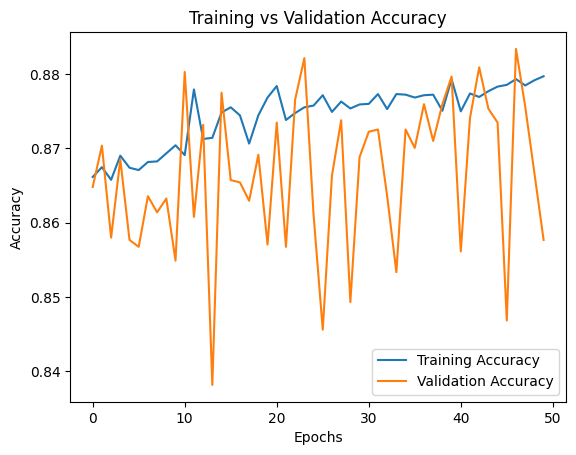

In [53]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"테스트 데이터 정확도: {test_acc:.4f}")


101/101 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8577
테스트 데이터 정확도: 0.8577
